In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
import seaborn as sns
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan_data=pd.read_csv('/content/Loan_dataset.csv')

In [9]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [3]:
loan_data.shape

(614, 13)

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
loan_data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [6]:
loan_data=loan_data.dropna()

In [8]:
loan_data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [7]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [12]:
# lable Encoding
loan_data.replace({"Loan_Status": {'N':0,'Y':1}},inplace=True)

<ipython-input-12-de017369e87b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data.replace({"Loan_Status": {'N':0,'Y':1}},inplace=True)


In [13]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [15]:
loan_data['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [16]:
loan_data = loan_data.replace(to_replace='3+', value=4)

In [17]:
loan_data['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


<Axes: xlabel='Education', ylabel='count'>

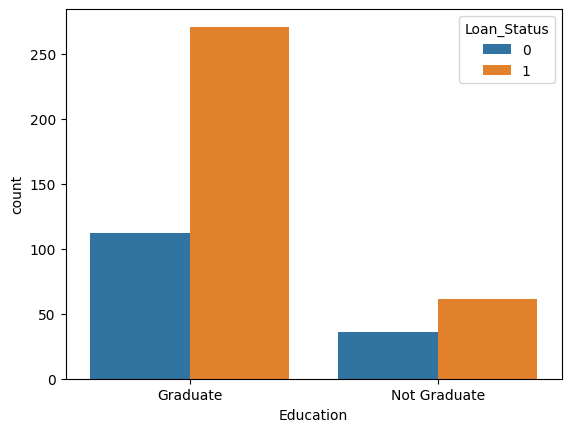

In [20]:
# Data Visulaization
sns.countplot(x='Education',hue='Loan_Status',data=loan_data)

<Axes: xlabel='Married', ylabel='count'>

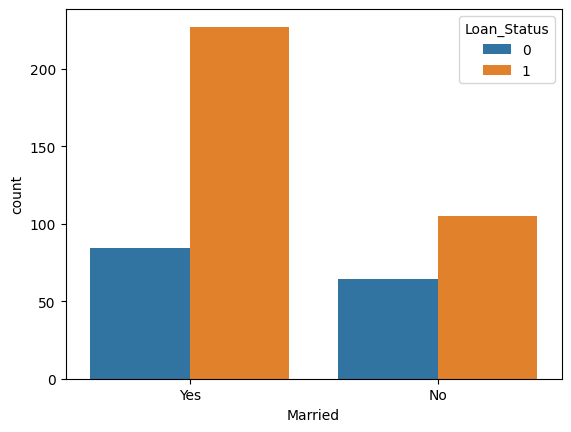

In [21]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_data)

In [23]:
# Convert catogorical to numerical
loan_data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [24]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


# DATA SEPERATION

In [25]:
x = loan_data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = loan_data['Loan_Status']

In [30]:
print(x.head())
print(y.head())

   Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1       1        1          1          1              0             4583   
2       1        1          0          1              1             3000   
3       1        1          0          0              0             2583   
4       1        0          0          1              0             6000   
5       1        1          2          1              1             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

   Property_Area  
1              0  
2              2  
3              2  
4              2  
5              2  
1    0
2

# Model training

In [31]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,stratify=y,random_state=2)

In [33]:
print(x.shape,x_train.shape,x_test.shape)

(480, 11) (432, 11) (48, 11)


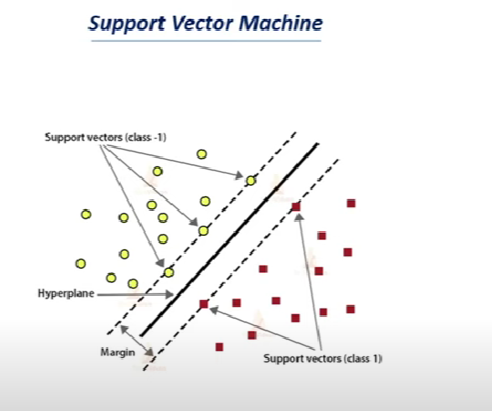

In [35]:
classifier = svm.SVC(kernel='linear')

In [36]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

# Model Evaluation

In [37]:
x_train_pred = classifier.predict(x_train)
training_accuracy = accuracy_score(x_train_pred,y_train)

In [39]:
print('Accuracy score on training data : ',training_accuracy)

Accuracy score on training data :  0.7986111111111112


In [40]:
x_test_pred = classifier.predict(x_test)
testing_accuracy = accuracy_score(x_test_pred,y_test)

In [41]:
print('Accuracy score on testing data : ',testing_accuracy)

Accuracy score on testing data :  0.8333333333333334


# Predictive Model System

In [47]:
print("🏦 Enter the following details to predict Loan Approval Status:\n")

# Getting user input
Gender = int(input("Gender (0 = Female, 1 = Male): "))
Married = int(input("Married (0 = No, 1 = Yes): "))
Dependents = int(input("Number of Dependents (e.g., 0, 1, 2, 3): "))
Education = int(input("Education (0 = Graduate, 1 = Not Graduate): "))
Self_Employed = int(input("Self Employed (0 = No, 1 = Yes): "))
ApplicantIncome = float(input("Applicant Income: "))
CoapplicantIncome = float(input("Coapplicant Income: "))
LoanAmount = float(input("Loan Amount (in thousands): "))
Loan_Amount_Term = float(input("Loan Amount Term (in days): "))
Credit_History = float(input("Credit History (0 = Bad, 1 = Good): "))
Property_Area = int(input("Property Area (0 = Rural, 1 = Semiurban, 2 = Urban): "))

# Converting input to numpy array
input_data = np.array([[
    Gender, Married, Dependents, Education, Self_Employed,
    ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term,
    Credit_History, Property_Area
]])

prediction = classifier.predict(input_data)

print("\n📊 Prediction Result:")
if prediction[0] == 1:
    print("✅ Loan will be Approved.")
else:
    print("❌ Loan will be Rejected.")

🏦 Enter the following details to predict Loan Approval Status:

Gender (0 = Female, 1 = Male): 1
Married (0 = No, 1 = Yes): 0
Number of Dependents (e.g., 0, 1, 2, 3): 0
Education (0 = Graduate, 1 = Not Graduate): 1
Self Employed (0 = No, 1 = Yes): 0
Applicant Income: 200
Coapplicant Income: 0
Loan Amount (in thousands): 300
Loan Amount Term (in days): 360
Credit History (0 = Bad, 1 = Good): 0
Property Area (0 = Rural, 1 = Semiurban, 2 = Urban): 0

📊 Prediction Result:
❌ Loan will be Rejected.
